In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential

## **Getting data**

In [ ]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('mpg')
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In this data, we have to predict the value of mpg (milws per gallon),
mpg = target variable
cylinders = no. of cylinders in car
displacement = engine car
horsepower = engine horsepower
weight = weight of car
acceleration = time takes by get into speed
model_year = year
origin = country of origin
name = model name

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.shape

(398, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## **Data Preparation**

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
df = df.drop('name', axis=1)

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

OUTLIERS: Extreme values/ values which do not lie in max probability

In [ ]:
print(df['horsepower'].skew())
print(df['displacement'].skew())
print(df['weight'].skew())
print(df['acceleration'].skew())

1.0955524807071189
0.7196451643005952
0.5310625125994629
0.27877684462588986


skew() = if the value is between 1 and -1, we don't have any outliers

In [ ]:
import numpy as np

df['horsepower'] = np.where(df['horsepower']>200, 200, df['horsepower'])

<Axes: ylabel='horsepower'>

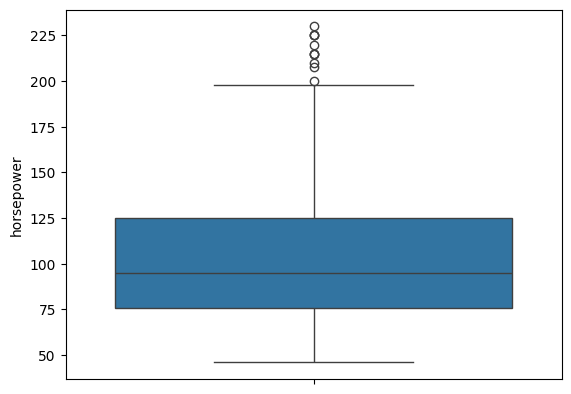

In [ ]:
sns.boxplot(df['horsepower'])

dummy encoding

In [ ]:
import pandas as pd

df = pd.get_dummies(df, columns=['origin'], drop_first=True, prefix='origin', dtype=int)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1


mpg is linear dataset.
cylinders and model_year, though have datatype of int. but they define the car category, so we need to perform one-hot encoding
eg : 1970 category model, 2024 category model

In [ ]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
393,27.0,4,140.0,86.0,2790,15.6,82,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,1
397,31.0,4,119.0,82.0,2720,19.4,82,0,1


In [ ]:
df = pd.get_dummies(df, columns=['cylinders'], drop_first=True, prefix='cylinder', dtype=int)
df = pd.get_dummies(df, columns=['model_year'], drop_first=True, prefix='year', dtype=int)

In [ ]:
df.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'origin_japan', 'origin_usa', 'cylinder_4', 'cylinder_5', 'cylinder_6',
       'cylinder_8', 'year_71', 'year_72', 'year_73', 'year_74', 'year_75',
       'year_76', 'year_77', 'year_78', 'year_79', 'year_80', 'year_81',
       'year_82'],
      dtype='object')

In [ ]:
target = ['mpg']
predictors = list(set(list(df.columns))-set(target))

In [ ]:
predictors

['year_75',
 'year_79',
 'cylinder_6',
 'year_80',
 'year_77',
 'cylinder_8',
 'year_71',
 'year_78',
 'year_73',
 'horsepower',
 'year_72',
 'weight',
 'acceleration',
 'origin_japan',
 'cylinder_5',
 'year_82',
 'displacement',
 'origin_usa',
 'year_81',
 'year_74',
 'year_76',
 'cylinder_4']

In [ ]:
X = df[predictors].values
y = df[target].values

In [ ]:
type(X)

numpy.ndarray

In [ ]:
y

## **Divide Train and Test Datasets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

## **Build Neural Network**

In [ ]:
X_train.shape

(278, 22)

In [ ]:
model = Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(3, ), activation='relu'))#INPUT LAYER
# model.add(tf.keras.layers.Dense(32), activation='relu') # HIDDEN LAYER
model.add(tf.keras.layers.Dense(1)) # OUTPUT LAYER

input shape defines the number of features every node will receive
input shape takes a tuple as a input

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 16        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
